<a href="https://colab.research.google.com/github/ameensalim1/LoanApprovalPredictor/blob/main/loanpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

R2 score:  0.9248451140523796
Mean Squared Error:  0.01756440281030445
Mean Absolute Error:  0.01756440281030445
R2 score:  0.9198347883225382
Mean Squared Error:  0.01873536299765808
Mean Absolute Error:  0.01873536299765808


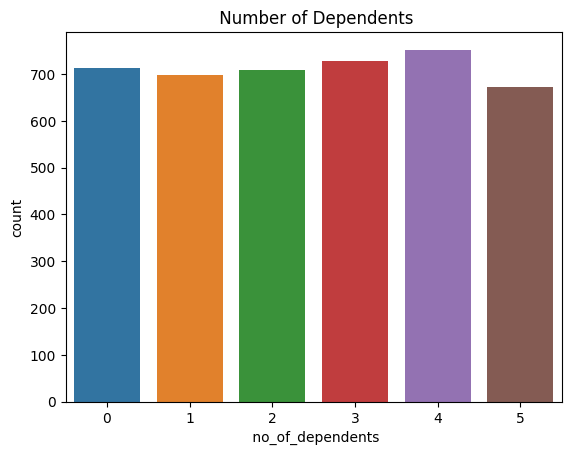

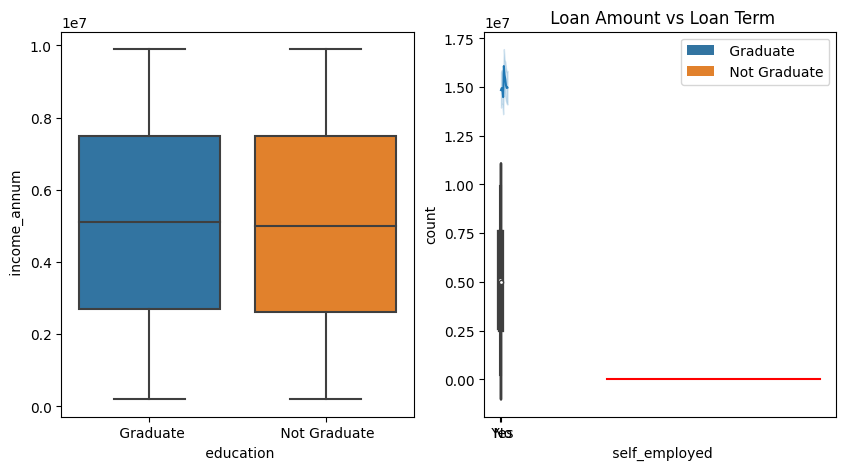

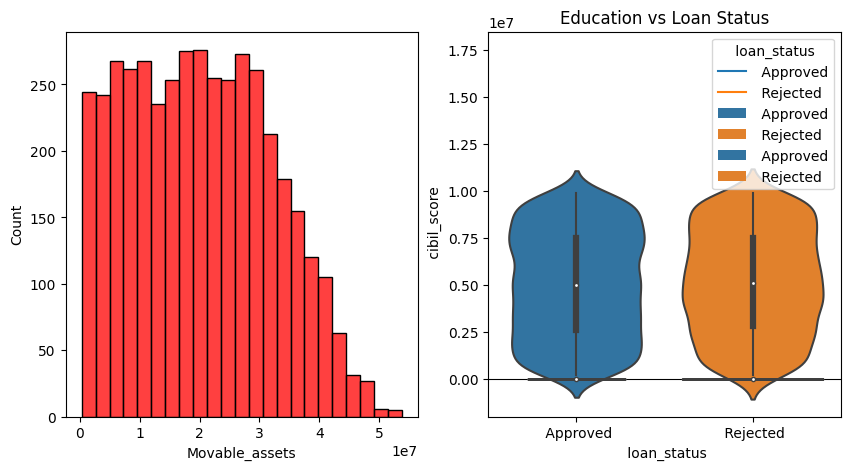

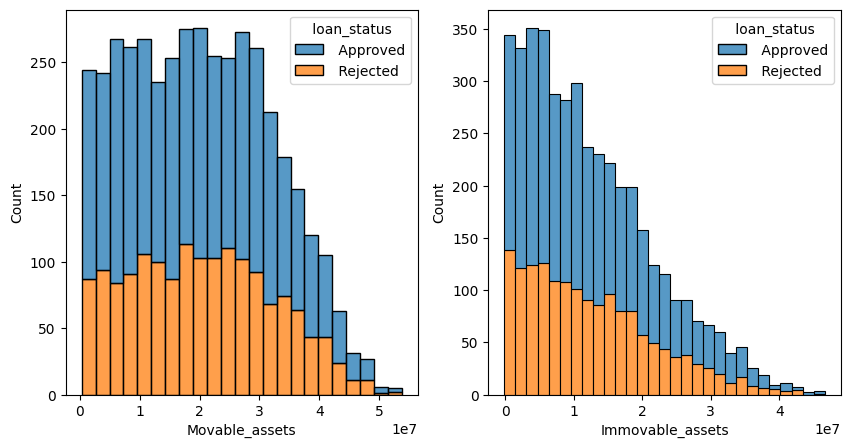

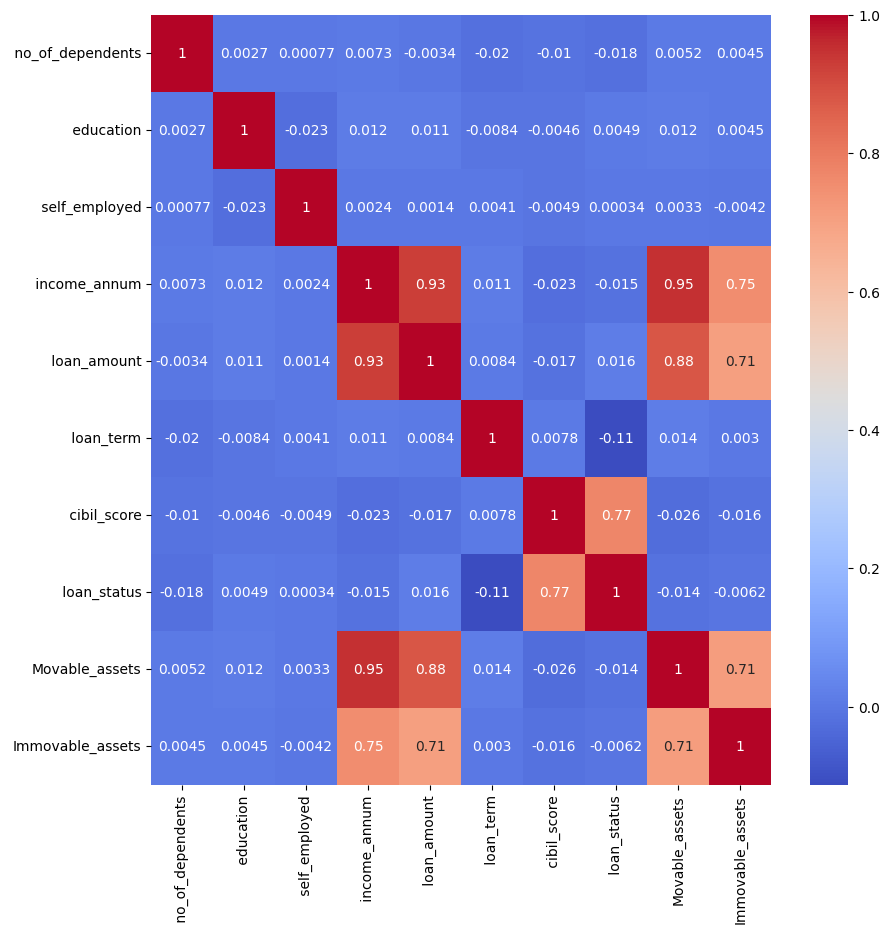

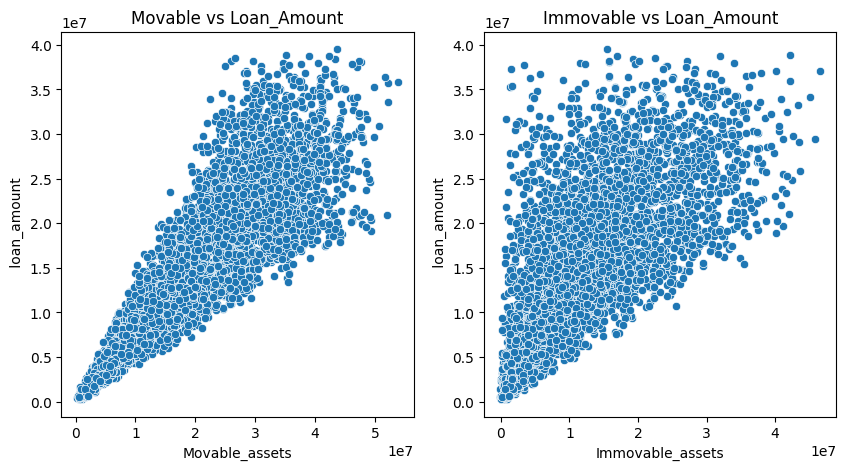

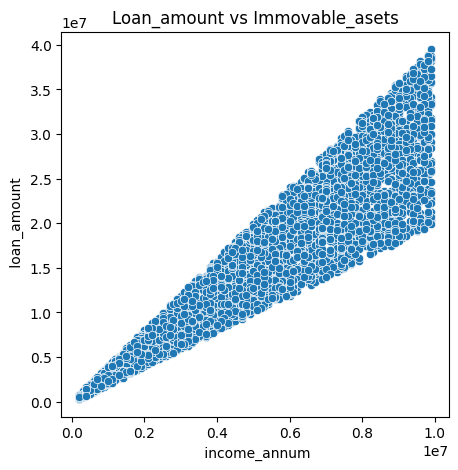

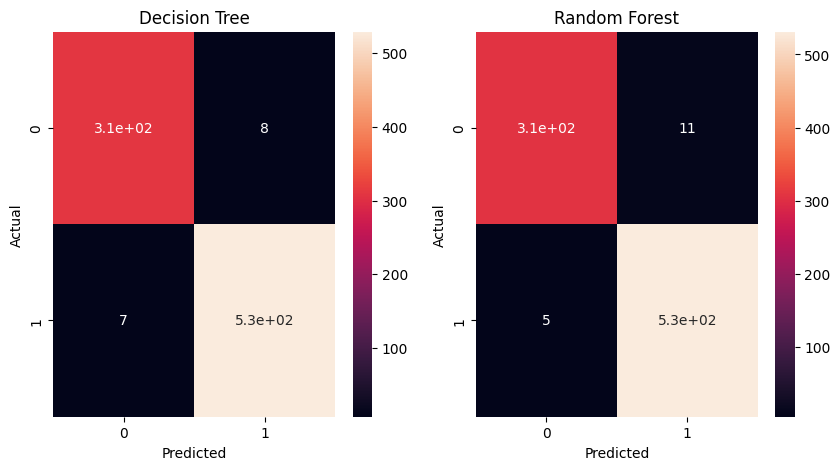

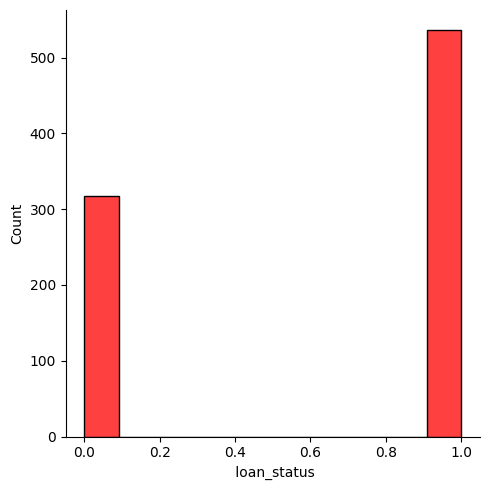

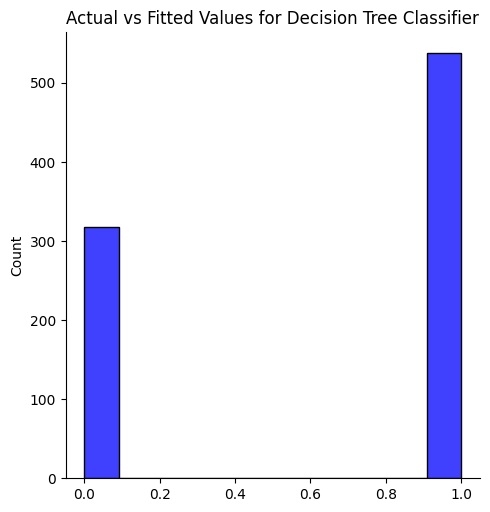

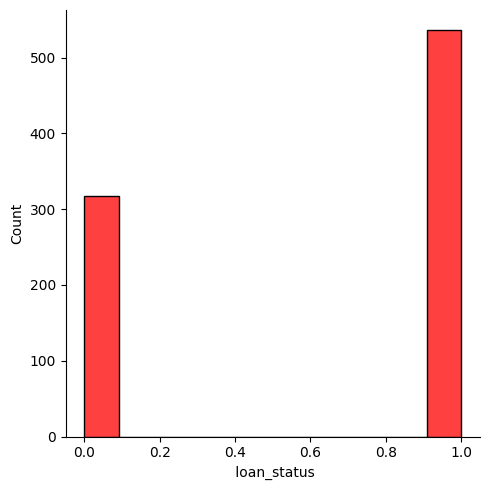

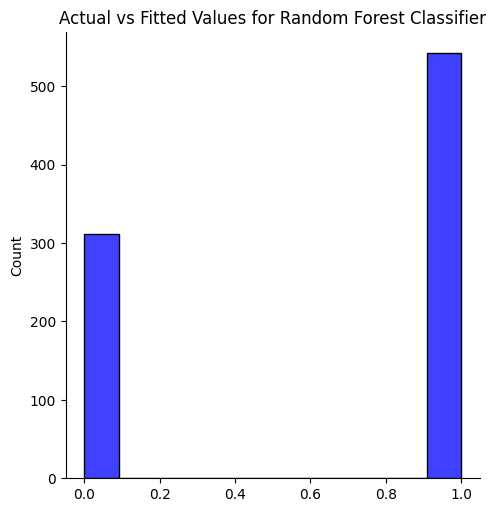

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv('loan_approval_dataset.csv')
df.head()
df.shape #shows how many columns and rows
df.drop(columns='loan_id', inplace = True) #removes column from table
df.isnull().sum() #how many empty colums
df.dtypes #gives datatypes

df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

df.drop(columns = [' bank_asset_value', ' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value'], inplace = True)
df.describe()
sns.countplot(x = ' no_of_dependents', data = df).set_title(' Number of Dependents')

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax = ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax = ax[1])
sns.countplot(x = ' self_employed', data = df, hue = ' education').set_title('Self Employed')
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title(' Loan Amount vs Loan Term')

sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')
fig, ax = plt.subplots(1, 2, figsize = [10, 5])
sns.histplot(df['Movable_assets'], ax = ax[0], color = 'red')
sns.histplot(df['Immovable_assets'], ax = ax[1], color = 'blue')

sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')
sns.countplot(x = ' education', data = df, hue = ' loan_status').set_title('Education vs Loan Status')

sns.violinplot(x = ' loan_status', y = ' income_annum', data = df)

sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df, hue = ' loan_status')

sns.violinplot(x = ' loan_status', y = ' cibil_score', data = df)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x = 'Movable_assets', data = df, ax = ax[0], hue = ' loan_status', multiple = 'stack')
sns.histplot(x = 'Immovable_assets', data = df, ax = ax[1], hue = ' loan_status', multiple = 'stack')


# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.scatterplot(x = 'Movable_assets', y = ' loan_amount', data = df, ax = ax[0]).set_title('Movable vs Loan_Amount')
sns.scatterplot(x = 'Immovable_assets', y = ' loan_amount', data = df, ax = ax[1]).set_title('Immovable vs Loan_Amount')

plt.figure(figsize = (5, 5))
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df).set_title('Loan_amount vs Immovable_asets')

#Training set
X_train, X_test, Y_train, Y_test = train_test_split(df.drop([' loan_status'], axis = 1), df[' loan_status'], test_size = 0.2, random_state = 42)

#Model Building
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
dtree.score(X_train, Y_train)
dtree_pred = dtree.predict(X_test)

rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
rfc.score(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

fig, ax = plt.subplots(1, 2, figsize = (10,5))
sns.heatmap(confusion_matrix(Y_test, dtree_pred), annot = True, ax = ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(Y_test, rfc_pred), annot = True, ax = ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

ax = sns.displot(x = Y_test, kind = 'hist', color = 'r', label = "Actual Value")
sns.displot(x = dtree_pred, kind = 'hist', color = 'b', label = "Fitted Values")
plt.title("Actual vs Fitted Values for Decision Tree Classifier")

ax = sns.displot(x = Y_test, kind = 'hist', color = 'r', label = "Actual Value")
sns.displot(x = rfc_pred, kind = 'hist', color = 'b', label = "Fitted Values")
plt.title("Actual vs Fitted Values for Random Forest Classifier")

print(classification_report(Y_test, dtree_pred))

print(classification_report(Y_test, rfc_pred))

print('R2 score: ', r2_score(Y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(Y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, dtree_pred))

print('R2 score: ', r2_score(Y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(Y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(Y_test, rfc_pred))




In [ ]:
from google.colab import drive
drive.mount('/content/drive')